In [1]:
import os
import shutil
from typing import Union

import sys
sys.path.append("/Users/jocareher/Library/CloudStorage/OneDrive-Personal/Educación/PhD_UPF_2023/face_detection/scripts/")
import data_setup, visualization

## Step 1: split json files, create .txt files, and copy corresponding images

In [8]:
# Create individual json files from master json file (babyset)
metadata = "/Users/jocareher/Downloads/babyset_raw.json"
output_dir = "/Users/jocareher/Downloads/new_dataset/new_babyset_json_files"
data_setup.process_and_save_json(metadata, output_dir)

# Create individual json files from master json file (bcn_babies)
metadata_bcn = "/Users/jocareher/Downloads/bcn_babies_raw.json"
output_dir_bcn = "/Users/jocareher/Downloads/new_dataset/new_bcn_babies_json_files"
data_setup.process_and_save_json(metadata_bcn, output_dir_bcn)

In [14]:
# Create individual json files from master json file (extra_faces)
metadata_bcn = "/Users/jocareher/Downloads/extra_faces.json"
output_dir_bcn = "/Users/jocareher/Downloads/new_dataset/extra_faces_json_files"
data_setup.process_and_save_json(metadata_bcn, output_dir_bcn)

In [ ]:
# Delete images without a corresponding json files
images_dir = "/Users/jocareher/Downloads/under_construction_dataset/Baby_Face"
json_folder = "/Users/jocareher/Downloads/new_babyset_json_files"
data_setup.delete_json_without_jpg(json_folder = json_folder,
                                   images_folder = images_dir)

In [11]:
# Create .txt file for each image
json_files = "/Users/jocareher/Downloads/new_dataset/new_babyset_json_files"
output_dir = "/Users/jocareher/Downloads/new_dataset/all_labels"
class_list = ["3/4_left_sideview", "3/4_rigth_sideview", "Frontal", "Left_sideview", "Right_sideview"]
original_size = True
output_format = "normalized_original"
data_setup.convert_annotations_to_yolo_obb(json_folder_path=json_files,
                                           output_folder_path=output_dir,
                                           class_list=class_list,
                                           original_size=original_size,
                                           output_format=output_format)

In [12]:
# Create .txt file for each image (bcn_babies)
json_files_bcn = "/Users/jocareher/Downloads/new_dataset/new_bcn_babies_json_files"
output_dir_bcn = "/Users/jocareher/Downloads/new_dataset/all_labels_bcn_babies"
class_list = ["3/4_left_sideview", "3/4_rigth_sideview", "Frontal", "Left_sideview", "Right_sideview"]
original_size = True
output_format = "normalized_original"
data_setup.convert_annotations_to_yolo_obb(json_folder_path=json_files_bcn,
                                           output_folder_path=output_dir,
                                           class_list=class_list,
                                           original_size=original_size,
                                           output_format=output_format)

In [15]:
# Create .txt file for each image (extra_faces)
json_files_extra = "/Users/jocareher/Downloads/new_dataset/extra_faces_json_files"
output_dir_extra = "/Users/jocareher/Downloads/new_dataset/all_labels_extra_faces"
class_list = ["3/4_left_sideview", "3/4_rigth_sideview", "Frontal", "Left_sideview", "Right_sideview"]
original_size = True
output_format = "normalized_original"
data_setup.convert_annotations_to_yolo_obb(json_folder_path=json_files_extra,
                                           output_folder_path=output_dir_extra,
                                           class_list=class_list,
                                           original_size=original_size,
                                           output_format=output_format)

In [18]:
def copy_corresponding_images(labels_dir: str, img_dir: str, output_dir: str) -> None:
    """
    Copies images corresponding to .txt files from one folder to another.
    
    This function scans through a directory for .txt files and another directory for image files (.jpg, .JPG).
    For each .txt file, it finds a corresponding image file with the same base name and copies it to a specified
    destination folder.
    
    Args:
        - labels_dir (str): The path to the directory containing .txt files.
        - img_dir (str): The path to the directory containing image files (.jpg, .JPG).
        - output_dir (str): The destination directory path where corresponding images will be copied.
    
    Returns:
    None
    """
    # Ensure the destination directory exists, create if it doesn't
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Loop through each file in the .txt directory
    for file in os.listdir(labels_dir):
        if file.endswith(".txt"):
            # Extract the base name without extension
            base_name = os.path.splitext(file)[0]
            
            # Look for corresponding .jpg or .JPG files in the image directory
            for img_ext in ['.jpg', '.JPG']:
                img_path = os.path.join(img_dir, base_name + img_ext)
                if os.path.exists(img_path):
                    # If found, copy the image to the destination directory
                    shutil.copy(img_path, output_dir)
                    print(f"Copied {img_path} to {output_dir}")
                    break  # Stop looking for other extensions once the file is found and copied

In [19]:
# Copy images for each corresponding .txt files (babyset)
labels_dir = "/Users/jocareher/Downloads/new_dataset/all_dataset_labels/all_labels_babyset"
img_dir = "/Users/jocareher/Downloads/under_construction_dataset/Baby_Face"
output_dir = "/Users/jocareher/Downloads/new_dataset/all_images/babyset_images"
copy_corresponding_images(labels_dir=labels_dir,
                          img_dir=img_dir,
                          output_dir=output_dir)

Copied /Users/jocareher/Downloads/under_construction_dataset/Baby_Face/face_img_3703.jpg to /Users/jocareher/Downloads/new_dataset/all_images/babyset_images
Copied /Users/jocareher/Downloads/under_construction_dataset/Baby_Face/face_img_5372.jpg to /Users/jocareher/Downloads/new_dataset/all_images/babyset_images
Copied /Users/jocareher/Downloads/under_construction_dataset/Baby_Face/face_img_1114.jpg to /Users/jocareher/Downloads/new_dataset/all_images/babyset_images
Copied /Users/jocareher/Downloads/under_construction_dataset/Baby_Face/face_img_965.jpg to /Users/jocareher/Downloads/new_dataset/all_images/babyset_images
Copied /Users/jocareher/Downloads/under_construction_dataset/Baby_Face/face_img_7565.jpg to /Users/jocareher/Downloads/new_dataset/all_images/babyset_images
Copied /Users/jocareher/Downloads/under_construction_dataset/Baby_Face/face_img_7203.jpg to /Users/jocareher/Downloads/new_dataset/all_images/babyset_images
Copied /Users/jocareher/Downloads/under_construction_datase

In [20]:
# Copy images for each corresponding .txt files (bcn_babies)
labels_dir_bcn = "/Users/jocareher/Downloads/new_dataset/all_dataset_labels/all_labels_bcn_babies"
img_dir_bcn = "/Users/jocareher/Downloads/under_construction_dataset/Hospital_del_Mar"
output_dir_bcn = "/Users/jocareher/Downloads/new_dataset/all_images/bcn_babies_images"
copy_corresponding_images(labels_dir=labels_dir_bcn,
                          img_dir=img_dir_bcn,
                          output_dir=output_dir_bcn)

Copied /Users/jocareher/Downloads/under_construction_dataset/Hospital_del_Mar/face_bcn_22.jpg to /Users/jocareher/Downloads/new_dataset/all_images/bcn_babies_images
Copied /Users/jocareher/Downloads/under_construction_dataset/Hospital_del_Mar/face_bcn_36.jpg to /Users/jocareher/Downloads/new_dataset/all_images/bcn_babies_images
Copied /Users/jocareher/Downloads/under_construction_dataset/Hospital_del_Mar/face_bcn_348.jpg to /Users/jocareher/Downloads/new_dataset/all_images/bcn_babies_images
Copied /Users/jocareher/Downloads/under_construction_dataset/Hospital_del_Mar/face_bcn_412.jpg to /Users/jocareher/Downloads/new_dataset/all_images/bcn_babies_images
Copied /Users/jocareher/Downloads/under_construction_dataset/Hospital_del_Mar/face_bcn_374.jpg to /Users/jocareher/Downloads/new_dataset/all_images/bcn_babies_images
Copied /Users/jocareher/Downloads/under_construction_dataset/Hospital_del_Mar/face_bcn_360.jpg to /Users/jocareher/Downloads/new_dataset/all_images/bcn_babies_images
Copied

In [21]:
# Copy images for each corresponding .txt files (extra_faces)
labels_dir_extra = "/Users/jocareher/Downloads/new_dataset/all_dataset_labels/all_labels_extra_faces"
img_dir_extra = "/Users/jocareher/Downloads/under_construction_dataset/extra_faces"
output_dir_extra = "/Users/jocareher/Downloads/new_dataset/all_images/extra_faces_images"
copy_corresponding_images(labels_dir=labels_dir_extra,
                          img_dir=img_dir_extra,
                          output_dir=output_dir_extra)

Copied /Users/jocareher/Downloads/under_construction_dataset/extra_faces/extra_faces_13.jpg to /Users/jocareher/Downloads/new_dataset/all_images/extra_faces_images
Copied /Users/jocareher/Downloads/under_construction_dataset/extra_faces/extra_faces_07.jpg to /Users/jocareher/Downloads/new_dataset/all_images/extra_faces_images
Copied /Users/jocareher/Downloads/under_construction_dataset/extra_faces/extra_faces_06.jpg to /Users/jocareher/Downloads/new_dataset/all_images/extra_faces_images
Copied /Users/jocareher/Downloads/under_construction_dataset/extra_faces/extra_faces_12.jpg to /Users/jocareher/Downloads/new_dataset/all_images/extra_faces_images
Copied /Users/jocareher/Downloads/under_construction_dataset/extra_faces/extra_faces_38.jpg to /Users/jocareher/Downloads/new_dataset/all_images/extra_faces_images
Copied /Users/jocareher/Downloads/under_construction_dataset/extra_faces/extra_faces_04.jpg to /Users/jocareher/Downloads/new_dataset/all_images/extra_faces_images
Copied /Users/jo

## Step 2: Generate flipped images

In [66]:
# Create flipped images from split sets (train, val, test)
data_setup.generate_horizontal_flipped_images("/Users/jocareher/Downloads/new_dataset/final_babyset_split_per_set/test", "/Users/jocareher/Downloads/new_dataset/images_per_dataset")

All images and labels have been flipped and saved in /Users/jocareher/Downloads/new_dataset/images_per_dataset


## Step 3: Create train, val and test sets

In [62]:
# Split dataset into train, val and test set
data_setup.distribute_dataset("/Users/jocareher/Downloads/new_dataset/all_dataset_files", "/Users/jocareher/Downloads/new_dataset/final_babyset_split_per_set")

In [63]:
# Count how many annotations are per labels (without flips)
data_setup.count_labels_per_class_and_set("/Users/jocareher/Downloads/new_dataset/final_babyset_split_per_set")

Label count for the train set:
  3/4_left_sideview: 1827
  3/4_right_sideview: 1613
  Frontal: 3092
  Left_sideview: 514
  Right_sideview: 518

Label count for the val set:
  3/4_left_sideview: 238
  3/4_right_sideview: 234
  Frontal: 356
  Left_sideview: 62
  Right_sideview: 62

Label count for the test set:
  3/4_left_sideview: 221
  3/4_right_sideview: 169
  Frontal: 435
  Left_sideview: 45
  Right_sideview: 61



In [68]:
# Count how many annotations are per labels (flips per set)
data_setup.count_labels_per_class_and_set("/Users/jocareher/Downloads/new_dataset/final_babyset_split_per_set")

Label count for the train set:
  3/4_left_sideview: 3295
  3/4_right_sideview: 3265
  Frontal: 3092
  Left_sideview: 981
  Right_sideview: 980

Label count for the val set:
  3/4_left_sideview: 441
  3/4_right_sideview: 451
  Frontal: 356
  Left_sideview: 122
  Right_sideview: 118

Label count for the test set:
  3/4_left_sideview: 375
  3/4_right_sideview: 376
  Frontal: 435
  Left_sideview: 102
  Right_sideview: 104



In [60]:
# Count how many annotations are per labels (flips with all the images)
data_setup.count_labels_per_class_and_set("/Users/jocareher/Downloads/new_dataset/final_babyset")

Label count for the train set:
  3/4_left_sideview: 3269
  3/4_right_sideview: 3294
  Frontal: 3120
  Left_sideview: 990
  Right_sideview: 941

Label count for the val set:
  3/4_left_sideview: 426
  3/4_right_sideview: 404
  Frontal: 372
  Left_sideview: 102
  Right_sideview: 134

Label count for the test set:
  3/4_left_sideview: 416
  3/4_right_sideview: 394
  Frontal: 391
  Left_sideview: 113
  Right_sideview: 127



# Step 3: Visualize the new annotations on the images

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import random
import numpy as np
## NEED TO CHECK THIS FUNCTION
def plot_images_with_labels_and_obboxes(
    root_dir: str,
    output_dir: str = None,
    save_images: bool = True,
    display_images: bool = False,
    num_images_to_display: int = 4,
    line_thickness: int = 5,
    font_size: int = 14
):
    """
    Processes all images in a directory, draws oriented bounding boxes (OBBoxes) and the class index with specified
    line thickness and font size. It optionally saves the resulting images and/or displays a subset of them in a grid.
    """
    
    # Directory for images
    images_dir = os.path.join(root_dir, "images")
    # Directory for labels
    labels_dir = os.path.join(root_dir, "labels")
    # List for storing paths of images for display
    displayed_images = []
    
    # Create output directory if it doesn't exist and saving is enabled
    if save_images and output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through each image in the images directory
    for image_name in os.listdir(images_dir):
        # Construct full path to image file
        image_path = os.path.join(images_dir, image_name)
        # Open the image
        image = Image.open(image_path)

        # Check if label file exists and process it
        label_path = os.path.join(labels_dir, os.path.splitext(image_name)[0] + ".txt")
        if os.path.exists(label_path):
            with open(label_path, "r") as file:
                for line in file.readlines():
                    # If we are going to display images, create the plot
                    if display_images or save_images:
                        fig, ax = plt.subplots()
                        ax.imshow(image)
                        ax.axis("off")

                    class_index, *bbox_coords = line.strip().split()
                    coordinates = list(map(float, bbox_coords))
                    absolute_coordinates = [
                        (coordinates[i] * image.width, coordinates[i + 1] * image.height)
                        for i in range(0, len(coordinates), 2)
                    ]
                    
                    # Only add patches if we're going to display or save the image
                    if display_images or save_images:
                        polygon = patches.Polygon(
                            absolute_coordinates, closed=True, linewidth=line_thickness,
                            edgecolor="red", facecolor="none"
                        )
                        ax.add_patch(polygon)
                        ax.text(
                            absolute_coordinates[0][0], absolute_coordinates[0][1],
                            class_index, verticalalignment="top", color="green",
                            fontsize=font_size, weight="bold"
                        )

                    # If saving of images is enabled, save the processed image
                    if save_images and output_dir:
                        output_image_path = os.path.join(output_dir, image_name)
                        fig.savefig(
                            output_image_path,
                            bbox_inches="tight",
                            pad_inches=0
                        )

                    # Close the plot to free memory if we created one
                    if display_images or save_images:
                        plt.close(fig)

        # Add image path to list for display if display_images is True
        if display_images:
            displayed_images.append(image_path)

    # Display images in a grid if required
    if display_images and displayed_images:
        images_to_display = random.sample(displayed_images, min(num_images_to_display, len(displayed_images)))
        rows, cols = determine_grid_size(len(images_to_display))
        fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
        for ax, img_path in zip(axes.ravel(), images_to_display):
            img = Image.open(img_path)
            ax.imshow(img)
            ax.axis("off")
            ax.set_title(os.path.basename(img_path))
        
        for ax in axes.ravel()[len(images_to_display):]:
            ax.axis("off")
        
        plt.tight_layout()
        plt.show()

    # Print confirmation if images were saved
    if save_images and output_dir:
        print(f"All images have been processed and saved in {output_dir}")

def determine_grid_size(num_images: int) -> tuple:
    """
    Determines the number of rows and columns for the grid based on the number of images to display.
    """
    cols = int(np.ceil(np.sqrt(num_images)))
    rows = int(np.ceil(num_images / cols))
    return rows, cols

KeyboardInterrupt: 

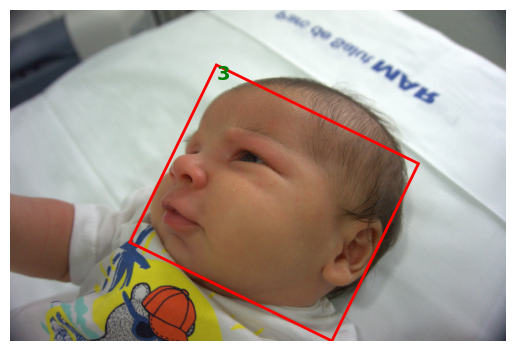

In [5]:
plot_images_with_labels_and_obboxes("/Users/jocareher/Downloads/new_dataset/final_babyset_split_per_set/test", "/Users/jocareher/Downloads/new_testset_plots", True, True, 10, line_thickness=2)

In [58]:
data_setup.generate_horizontal_flipped_images("/Users/jocareher/Downloads/new_dataset/all_dataset_files", "/Users/jocareher/Downloads/new_dataset/")

All images and labels have been flipped and saved in /Users/jocareher/Downloads/new_dataset/


## Step 4: Copy .json correspoding to test set

In [72]:
data_setup.copy_corresponding_jsons("/Users/jocareher/Downloads/new_dataset/json_files_per_dataset/all_json_files","/Users/jocareher/Downloads/new_dataset/final_babyset_split_per_set/val/images", "/Users/jocareher/Downloads/new_dataset/train")

Copied: face_img_4650.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_8389.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_5554.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_2012.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_5387.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_5692.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_2507.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_8624.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_2679.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_4607.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_6285.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_4312.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_1813.json to /Users/jocareher/Downloads/new_dataset/train
Copied: face_img_4484.jso

In [73]:
# Create a new image per instance on test set
data_setup.split_annotations_and_create_new_files_per_face("/Users/jocareher/Downloads/new_dataset/test_set_for_rotating", "/Users/jocareher/Downloads/new_dataset/bechmark_test")

In [ ]:
data_setup.flip_rotation_in_json_file("/Users/jocareher/Downloads/new_dataset/test_set_for_rotating/json", "/Users/jocareher/Downloads/new_dataset/flipped_json")

In [78]:
#
data_setup.delete_json_without_jpg("/Users/jocareher/Downloads/new_dataset/flipped_json", "/Users/jocareher/Downloads/new_dataset/images_per_dataset/flipped_test_images")

Deleted: flip_face_img_371.json
Deleted: flip_face_img_1848.json
Deleted: flip_face_img_2767.json
Deleted: flip_face_img_7709.json
Deleted: flip_face_img_8278.json
Deleted: flip_face_img_7027.json
Deleted: flip_face_img_8297.json
Deleted: flip_face_img_6323.json
Deleted: flip_face_img_6765.json
Deleted: flip_face_img_7877.json
Deleted: flip_face_img_8147.json
Deleted: flip_face_img_449.json
Deleted: flip_face_img_7573.json
Deleted: flip_face_img_6948.json
Deleted: flip_face_img_6175.json
Deleted: flip_face_img_7733.json
Deleted: flip_face_img_7699.json
Deleted: flip_face_img_648.json
Deleted: flip_face_bcn_22.json
Deleted: flip_face_img_977.json
Deleted: flip_face_img_5870.json
Deleted: flip_face_img_4332.json
Deleted: flip_face_img_3048.json
Deleted: flip_face_img_2911.json
Deleted: flip_face_img_3316.json
Deleted: flip_face_img_7705.json
Deleted: flip_face_img_8223.json
Deleted: flip_face_img_5807.json
Deleted: flip_face_img_3087.json
Deleted: flip_face_img_2696.json
Deleted: flip_fa

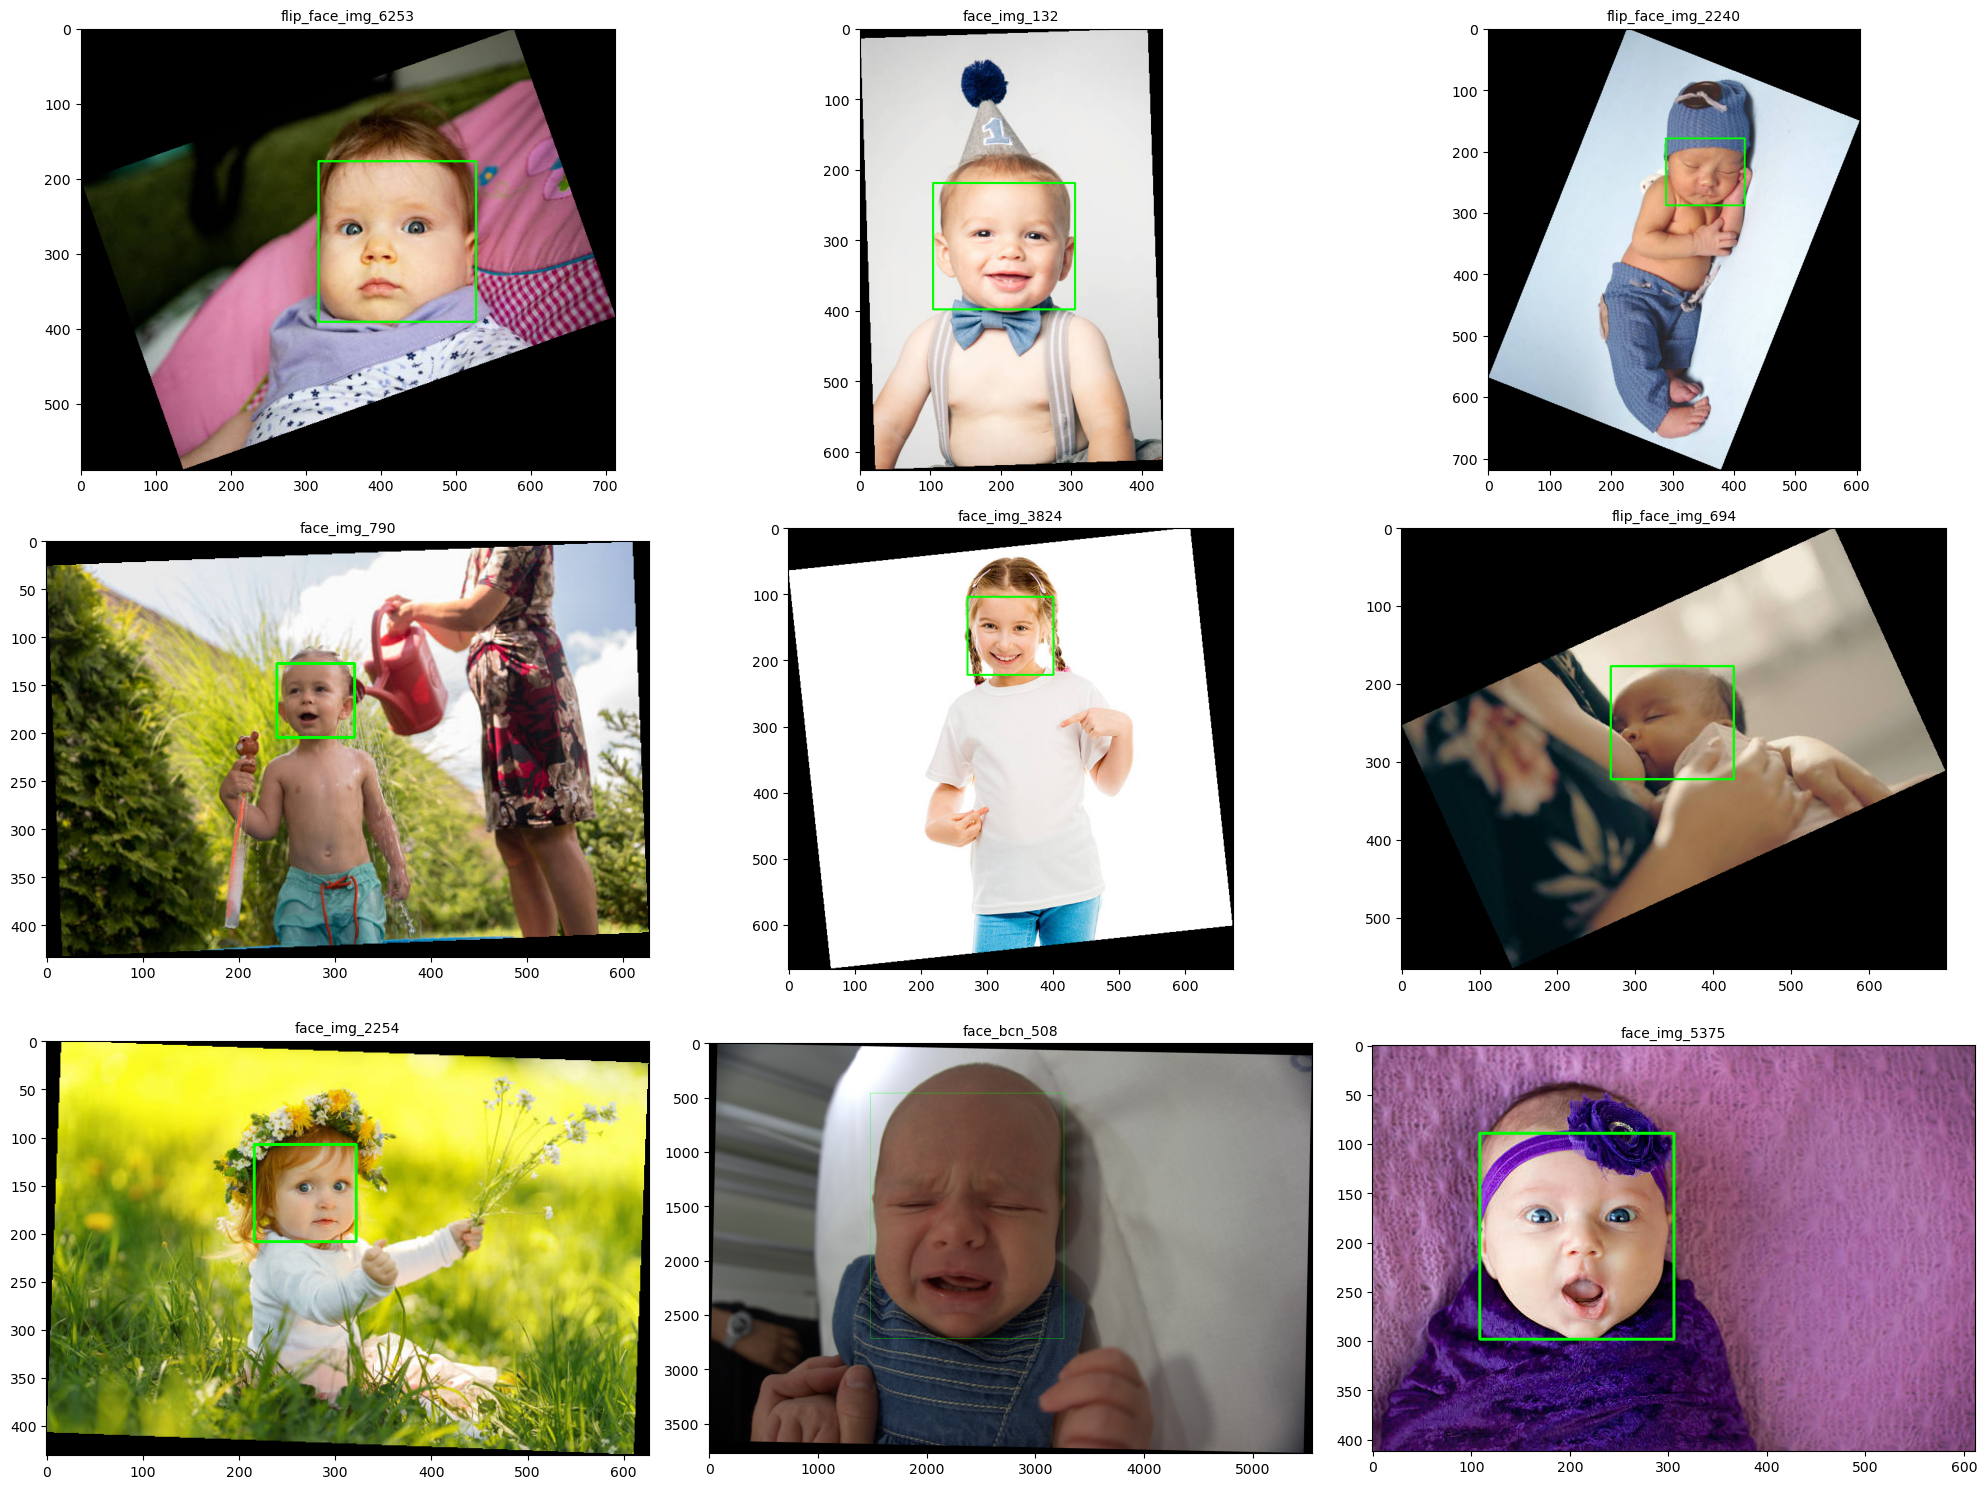

In [2]:
data_setup.visualize_rotated_images_and_aabboxes("/Users/jocareher/Downloads/new_dataset/bechmark_test", "/Users/jocareher/Downloads/benchmark_test_rotated_2", 9, True, False)

In [85]:
data_setup.update_bbox_class_index("/Users/jocareher/Downloads/flipped_labels")

In [28]:
import os
from PIL import Image

# Función auxiliar para convertir las coordenadas
def convert_coordinates(txt_content, img_width, img_height):
    absolute_coordinates = []
    for line in txt_content.strip().split('\n'):
        parts = line.split()
        if len(parts) == 9:
            class_index = int(parts[0])
            # Convertir coordenadas normalizadas a absolutas y a enteros
            x1, y1 = int(float(parts[1]) * img_width), int(float(parts[2]) * img_height)
            x2, y2 = int(float(parts[3]) * img_width), int(float(parts[4]) * img_height)
            x3, y3 = int(float(parts[5]) * img_width), int(float(parts[6]) * img_height)
            x4, y4 = int(float(parts[7]) * img_width), int(float(parts[8]) * img_height)
            absolute_coordinates.append((class_index, x1, y1, x2, y2, x3, y3, x4, y4))
        else:
            class_index = int(parts[0])
            score = (float(parts[-1]))
            # Convertir coordenadas normalizadas a absolutas y a enteros
            x1, y1 = int(float(parts[1]) * img_width), int(float(parts[2]) * img_height)
            x2, y2 = int(float(parts[3]) * img_width), int(float(parts[4]) * img_height)
            x3, y3 = int(float(parts[5]) * img_width), int(float(parts[6]) * img_height)
            x4, y4 = int(float(parts[7]) * img_width), int(float(parts[8]) * img_height)
            absolute_coordinates.append((class_index, score, x1, y1, x2, y2, x3, y3, x4, y4))
    return absolute_coordinates


def convert_and_save_coordinates(root_path, save_path):
    # Crear el directorio de guardado si no existe
    if not os.path.exists(save_path):
        os.makedirs(save_path)

    labels_path = os.path.join(root_path, 'labels')
    images_path = os.path.join(root_path, 'images')

    # Listar todos los archivos en la carpeta de labels
    for txt_file in os.listdir(labels_path):
        # Asumiendo que cada archivo .txt tiene un archivo .jpg correspondiente con el mismo nombre base
        base_name = os.path.splitext(txt_file)[0]
        image_file = base_name + '.jpg'
        
        # Cargar la imagen para obtener sus dimensiones
        image = Image.open(os.path.join(images_path, image_file))
        width, height = image.size

        # Leer las coordenadas normalizadas del archivo .txt
        with open(os.path.join(labels_path, txt_file), 'r') as file:
            txt_content = file.read()
        
        # Convertir las coordenadas a enteros absolutos
        absolute_coordinates = convert_coordinates(txt_content, width, height)
        
        # Escribir las coordenadas convertidas en un nuevo archivo .txt en la carpeta de guardado
        save_file_path = os.path.join(save_path, txt_file)
        with open(save_file_path, 'w') as file:
            for coords in absolute_coordinates:
                line = []
                for index, coord in enumerate(coords):
                    if index == 1:  # Suponiendo que el confidence score es siempre el segundo elemento
                        line.append(f"{coord:.6f}")  # Formatear el confidence como float
                    else:
                        line.append(str(int(coord)))  # Otros valores se convierten a int
                file.write(' '.join(line) + '\n')

In [29]:
# Llamar a la función con las rutas correspondientes
convert_and_save_coordinates('/Users/jocareher/Downloads/predict/', '/Users/jocareher/Downloads/predict/labels_abs')

In [27]:
import os

def convert_bbox_format(input_dir, output_dir, has_confidence_score=False):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Process each txt file in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.txt'):
            with open(os.path.join(input_dir, filename), 'r') as file:
                lines = file.readlines()
            
            new_lines = []
            for line in lines:
                parts = line.strip().split()
                if has_confidence_score:
                    # If there is a confidence score, it is the first number
                    confidence_score, x, y, x_plus_w, y_plus_h = map(float, parts)
                else:
                    # If there is no confidence score, there are only 4 numbers
                    x, y, x_plus_w, y_plus_h = map(float, parts)
                    confidence_score = None
                
                # Calculate the four corners based on x, y, x+w, y+h
                x1, y1 = x, y                   # Top-left corner
                x2, y2 = x_plus_w, y            # Top-right corner
                x3, y3 = x_plus_w, y_plus_h     # Bottom-right corner
                x4, y4 = x, y_plus_h            # Bottom-left corner

                if confidence_score is not None:
                    new_line = f"{confidence_score} {x1} {y1} {x2} {y2} {x3} {y3} {x4} {y4}"
                else:
                    new_line = f"{x1} {y1} {x2} {y2} {x3} {y3} {x4} {y4}"
                
                new_lines.append(new_line)

            # Write the new lines to the output file
            with open(os.path.join(output_dir, filename), 'w') as file:
                for line in new_lines:
                    file.write(line + '\n')


convert_bbox_format("/Users/jocareher/Downloads/retina_pred_all/4/labels", "//Users/jocareher/Downloads/retina_pred_all/4/labels", True)


TypeError: imshow() missing 1 required positional argument: 'X'

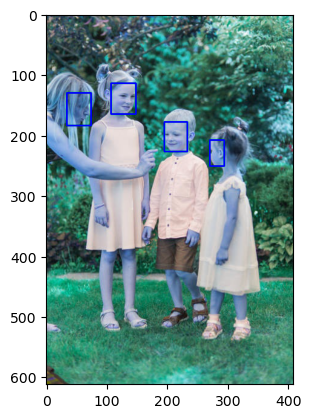

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_bboxes_from_file(image_path, bbox_file_path, output_path):
    # Leer la imagen original
    image = cv2.imread(image_path)
    if image is None:
        print("Error al cargar la imagen")
        return

    # Leer las bounding boxes del archivo
    with open(bbox_file_path, 'r') as file:
        lines = file.readlines()

    # Dibujar cada bounding box en la imagen
    for line in lines:
        parts = line.strip().split()
        # Suponiendo que los primeros elementos pueden ser un score de confianza
        points = list(map(float, parts[-8:]))  # Asumimos que los últimos 8 números son las coordenadas
        points = np.array(points, dtype=np.int32).reshape((-1, 1, 2))
        
        # Dibujar el polígono en la imagen
        cv2.polylines(image, [points], isClosed=True, color=(0, 0, 255), thickness=2)

    # Guardar la imagen con las bounding boxes dibujadas
    plt.imshow(image)
    plt.imshow()

# Ejemplo de uso:
draw_bboxes_from_file("/Users/jocareher/Downloads/retina_pred_all/images/extra_faces_05.jpg", "/Users/jocareher/Downloads/retina_pred_all/labels_new/extra_faces_05.txt", "/Users/jocareher/Downloads")
